In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures


#mpl.use('TkAgg',force=True)

%matplotlib inline

## Analysing logistic regression and the sigmoid function

In [2]:
def sigmoid(X,w):
    return 1/(1+np.exp(-X@w))

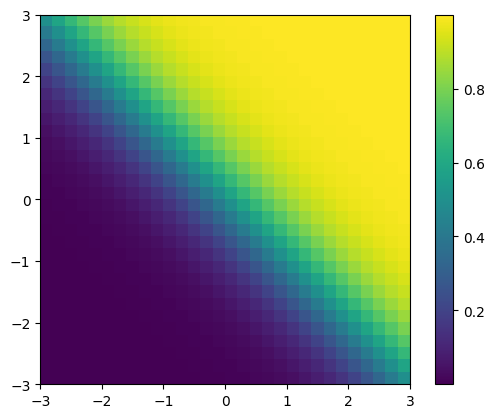

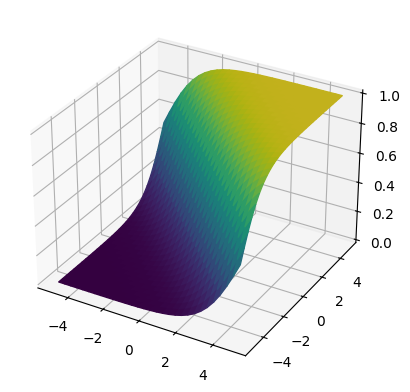

In [3]:
W= np.array([0,1,1])
xs= np.linspace(-5,5,30)
ys= np.linspace(-5,5,30)
x_mesh,y_mesh= np.meshgrid(xs,ys)
X= np.column_stack((np.ones(len(xs)*len(ys)),x_mesh.ravel(),y_mesh.ravel()))
Y= sigmoid(X,W)

im=plt.imshow(Y.reshape(x_mesh.shape),extent=[-3,3,-3,3],origin='lower')
plt.colorbar(im)
plt.show()


fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
plot= ax.plot_surface(x_mesh,y_mesh,Y.reshape(x_mesh.shape),facecolors=plt.cm.viridis(Y.reshape(x_mesh.shape)))
plt.show()



In [4]:
#Cost for an XOR Gate 
def cost(w,X,Y):
    return -np.sum(Y*np.log(sigmoid(X,w))+(1-Y)*np.log(sigmoid(-X,w)),axis=0)

def grad_cost(w,X,Y):
    return -np.sum(X*(Y-sigmoid(X,w).reshape(Y.shape)),axis=0)

def ADAM(func,grad,init_pos,lr=0.001,beta_1=0.9,beta_2=0.99,eps=1e-8,max_iters=100000,tol=1e-4,**params):
    pos=init_pos
    m= np.zeros_like(pos)
    s= np.zeros_like(pos)
    
    for t in tqdm(range(1,max_iters+1)):
        g= grad(pos,**params)
        if np.all(np.abs(g)<tol):
            print(f"Converged in {t} iterations")
            break
                  
        m= beta_1*m +(1-beta_1)*g
        s= beta_2*s +(1-beta_2)*g**2
        m_hat_t= m/(1-beta_1**t)
        s_hat_t= s/(1-beta_2**t)
        pos-= lr*m_hat_t/(np.sqrt(s_hat_t)+eps)
            
    

    return pos,func(pos,**params)


def MSE(w,X,Y):
    return np.sum((Y-sigmoid(X,w).reshape(Y.shape))**2,axis=0)

def grad_MSE(w,X,Y):
    sig= sigmoid(X,w).reshape(Y.shape)
    return -2*np.sum(X*(Y-sig)*sig*(1-sig),axis=0)


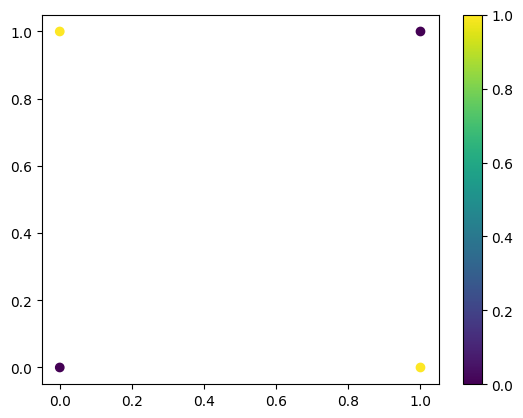

In [47]:
X= np.array([[1.,1.],[1.,0.],[0.,1.],[0.,0.]])
Y= np.array([0.,1.,1.,0.])

plot=plt.scatter(X[:,0],X[:,1],c=Y)
plt.colorbar(plot)
plt.show()

In [48]:
wxs= np.linspace(-4,4,30)
wys= np.linspace(-4,4,30)

Wx,Wy= np.meshgrid(wxs,wys)
W_cost= np.vstack((Wx.ravel(),Wy.ravel()))

cost_fs= cost(W_cost,X,Y[:,np.newaxis])

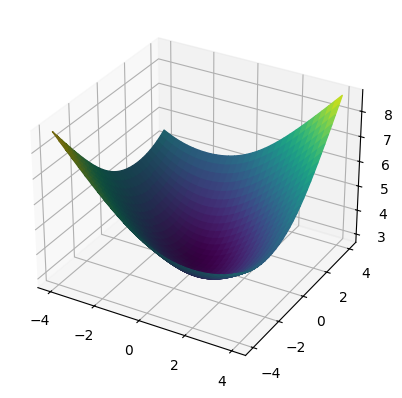

In [49]:
#mpl.use("TkAgg",force=True)
fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
norm = plt.Normalize(cost_fs.min(), cost_fs.max())
colors= plt.cm.viridis(norm(cost_fs.reshape(Wx.shape)))
im= ax.plot_surface(Wx,Wy,cost_fs.reshape(Wx.shape),facecolors=colors)

In [50]:
#X_train= np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
X_train= PolynomialFeatures(degree=2).fit_transform(X)
Y= Y[:,np.newaxis]

In [51]:
W_hat,func_optimum= ADAM(cost,grad_cost,np.random.random(X_train.shape[1]),tol=1e-8,**{'X':X_train,'Y':Y})

  0%|          | 0/100000 [00:00<?, ?it/s]

 79%|███████▉  | 79384/100000 [00:04<00:01, 17246.51it/s]

Converged in 79385 iterations


In [52]:
print(f"{W_hat}\n{func_optimum}\n{sigmoid(X_train,W_hat)}")

[-18.08219976  18.59501676  18.24624616  17.78001288 -73.0885971
  18.12878348]
[36.84147521 36.5856598  36.5856598  36.16439958]
[9.99943150e-09 9.99999989e-01 9.99999989e-01 1.40281505e-08]


C:\Users\prith\AppData\Local\Temp\ipykernel_19768\4183656517.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X@w))


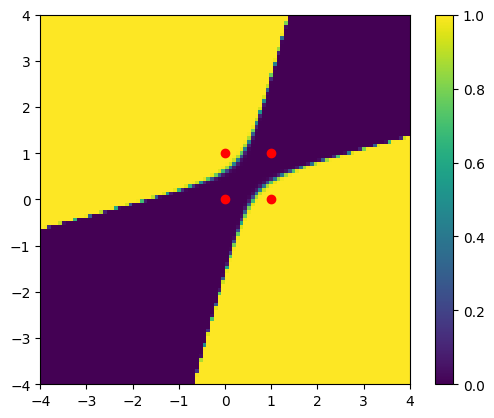

In [53]:
xs= np.linspace(-4,4,100)
ys= np.linspace(-4,4,100)
X_mesh,Y_mesh= np.meshgrid(xs,ys)
#X_t= np.column_stack((np.ones_like(X_mesh.ravel()),X_mesh.ravel(),Y_mesh.ravel()))
X_t= np.column_stack((X_mesh.ravel(),Y_mesh.ravel()))
X_t= PolynomialFeatures(degree=2).fit_transform(X_t)

im= plt.imshow(sigmoid(X_t,W_hat).reshape(X_mesh.shape).round(6),extent=[-4,4,-4,4],origin='lower')
plt.scatter(X[:,0],X[:,1],c='Red')
plt.colorbar(im)
plt.show()

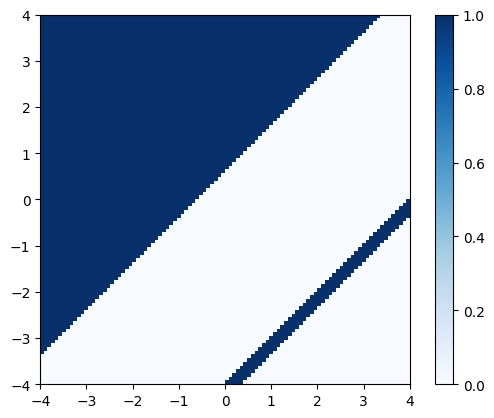

In [83]:
xs= np.linspace(-4,4,100)
ys= np.linspace(-4,4,100)
X_mesh,Y_mesh= np.meshgrid(xs,ys)
Z= np.astype(((Y_mesh-X_mesh)>0.6)|(((Y_mesh-X_mesh)<-4)&((Y_mesh-X_mesh)>-4.4)),float)

im=plt.imshow(Z,extent=[-4,4,-4,4],origin='lower',cmap='Blues')
plt.colorbar(im)
plt.show()

In [89]:
#X_train= np.column_stack((np.ones_like(X_mesh.ravel()),X_mesh.ravel(),Y_mesh.ravel()))
X= np.column_stack((X_mesh.ravel(),Y_mesh.ravel()))
X_train= PolynomialFeatures(degree=3).fit_transform(X)
Y=Z.reshape(len(X),-1)
W_hat,func_optimum= ADAM(cost,grad_cost,np.random.random(X_train.shape[1]),tol=1,**{'X':X_train,'Y':Y})

 58%|█████▊    | 58366/100000 [00:41<00:29, 1413.40it/s]
C:\Users\prith\AppData\Local\Temp\ipykernel_19768\4183656517.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X@w))
C:\Users\prith\AppData\Local\Temp\ipykernel_19768\2846203336.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.sum(Y*np.log(sigmoid(X,w))+(1-Y)*np.log(sigmoid(-X,w)),axis=0)


Converged in 58367 iterations


C:\Users\prith\AppData\Local\Temp\ipykernel_19768\2846203336.py:3: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y*np.log(sigmoid(X,w))+(1-Y)*np.log(sigmoid(-X,w)),axis=0)


In [90]:
print(f"{W_hat}\n{func_optimum}\n{sigmoid(X_train,W_hat)}")

[-38.43846208 -44.85050191  44.85050191  27.9386903  -55.87038657
  27.9386903   -3.58020771  10.73603709 -10.73603709   3.58020771]
[173159.38743877 188754.63952051 202751.51001257 ... 137014.07613851
 155936.0519983  173159.38743877]
[2.26457915e-17 7.17609071e-19 3.23916729e-20 ... 6.75257488e-14
 1.02467756e-15 2.26457915e-17]


In [91]:
Y_pred=np.round(sigmoid(X_train,W_hat))
np.unique(Y_pred,return_counts=True)

(array([0., 1.]), array([5482, 4518]))

In [92]:
np.unique(Y.reshape(-1)==Y_pred,return_counts=True)

(array([ True]), array([10000]))

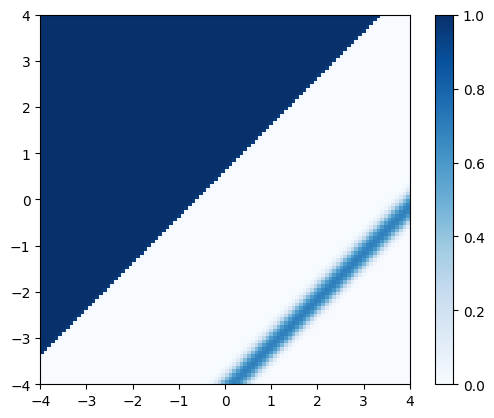

In [93]:
im=plt.imshow(sigmoid(X_train,W_hat).reshape(X_mesh.shape),extent=[-4,4,-4,4],origin='lower',cmap='Blues')
plt.colorbar(im)
plt.show()